<a href="https://colab.research.google.com/github/ShrutiJain456/compute/blob/main/Copy_of_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree 

[Dataset](https://drive.google.com/file/d/1EeorIZFT2JSM_KeFgnkwD_TqafeuoxNB/view?usp=sharing)

The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [2]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Loading Data**

In [4]:
df = pd.read_csv('/content/drive/MyDrive/diabetes.csv')
df
# load dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**Feature Selection**

Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [5]:
#split dataset in features and target variable
X = df.iloc[:, :-1]
y = df.Outcome

**Splitting Data**

In [6]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

**Building Decision Tree Model**

create a Decision Tree Model using Scikit-learn with default parametes

In [7]:
# Create Decision Tree classifer object
tree = DecisionTreeClassifier(random_state = 0)
# Train Decision Tree Classifer
tree.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_tree = tree.predict(X_test)

**Evaluating Model**

In [8]:
# Model Accuracy, how often is the classifier correct?
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_tree)))

Model accuracy score with criterion gini index: 0.7188


**Visualizing Decision Trees**

You can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook. For plotting tree, you also need to install graphviz and pydotplus.



In [9]:
!pip install graphviz
!pip install six
!pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
from sklearn import tree
import matplotlib.pyplot as plt
import pydotplus

import graphviz 

**Optimizing Decision Tree Performance**

Try out different parameter values for optimizing the accuracy on max_deapth ,criterion etc

In [11]:
# Create Decision Tree classifer object
tree_clf = DecisionTreeClassifier(max_depth = 3, criterion = 'entropy', random_state = 0)
# Train Decision Tree Classifer
tree_clf.fit(X_test, y_test)
#Predict the response for test dataset
y_pred_clf  = tree_clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Model acuracy : {0:0.4f}".format(accuracy_score(y_test, y_pred_clf)))

Model acuracy : 0.7656


In [12]:
y_pred_train_en = tree_clf.predict(X_train)
print("Model acuracy : {0:0.4f}".format(accuracy_score(y_train, y_pred_train_en)))


Model acuracy : 0.6944


**Visualizing Decision Trees**

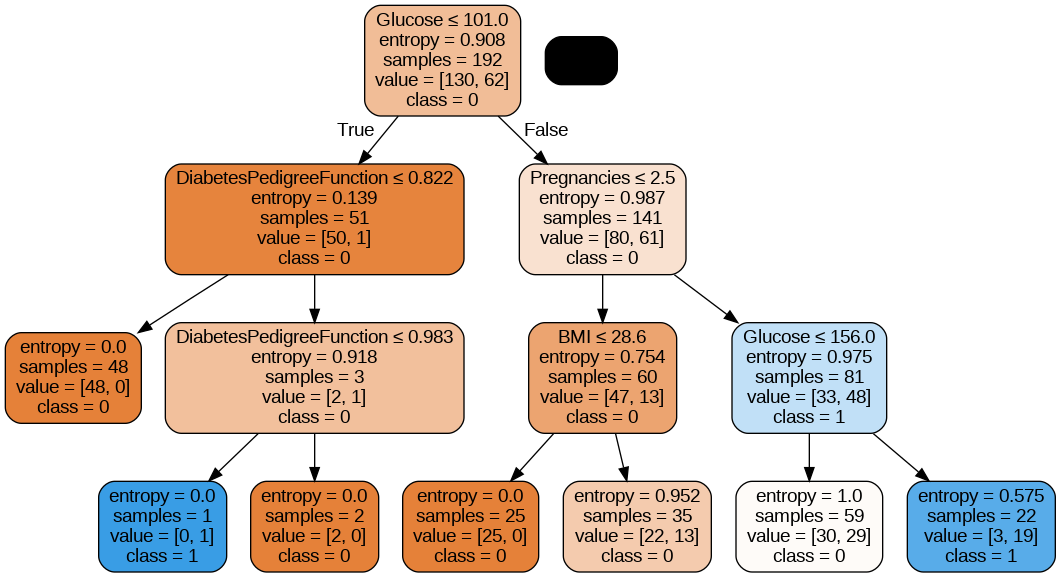

In [13]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=X_train.columns, class_names=['0', '1'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [14]:
tree_clf = DecisionTreeClassifier(max_depth = 3, criterion = 'entropy', random_state = 0)
# Train Decision Tree Classifer
tree_clf.fit(X_test, y_test)
#Predict the response for test dataset
y_pred_clf  = tree_clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Model acuracy : {0:0.4f}".format(accuracy_score(y_test, y_pred_clf)))

Model acuracy : 0.7656


In [15]:
y_pred_train_en = tree_clf.predict(X_train)
print("Model acuracy : {0:0.4f}".format(accuracy_score(y_train, y_pred_train_en)))


Model acuracy : 0.6944


**Implement Random Forest**

In [16]:
from sklearn.ensemble import RandomForestClassifier


In [17]:
# Create RandomForest Tree classifer object
rfc = RandomForestClassifier(random_state=0)
# Train RandomForest Tree Classifer
rfc.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = rfc.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.7708


In [18]:
y_pred_train = rfc.predict(X_train)
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Model accuracy score with 10 decision-trees : 1.0000


If the model overfitting try out different way to fix it!!

In [19]:
from sklearn.ensemble import BaggingClassifier

In [20]:
estimator_range = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

In [21]:

models = []
scores = []
for n_estimators in estimator_range:
  #create bagging classifier
  clf = BaggingClassifier(n_estimators = n_estimators, random_state = 20)
  #fit the model
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  #appending the model and score to their respective list
  models.append(clf)
  scores.append(accuracy_score(y_test, y_pred))

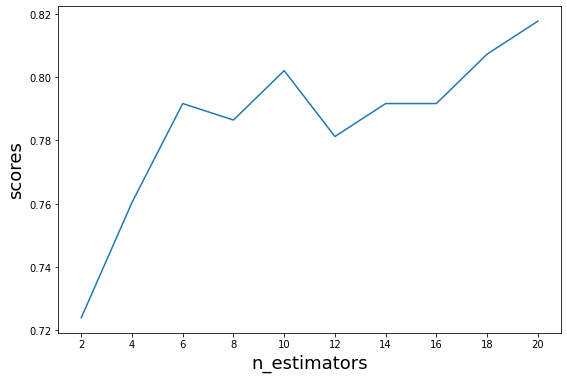

In [22]:
# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("scores", fontsize = 18)
plt.xticks(estimator_range, estimator_range)

# Visualize plot
plt.show()

In [23]:
y_pred_clf = clf.predict(X_train)
print('Model accuracy score with bagging classifier : {0:0.4f}'. format(accuracy_score(y_train, y_pred_clf)))

Model accuracy score with bagging classifier : 0.9948


### All the best!!! I hope you will Enjoy the Task!